<a href="https://colab.research.google.com/github/johnreyes96/artificial-vision/blob/master/src/main/python/classes/HistogramAndContrast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar numpy para dar soporte a:
# Concatenación de matrices - np.concatenate
import numpy as np

import math

# Importar el módulo cv2 de la librería opencv
import cv2
from google.colab.patches import cv2_imshow

# Soporte para visualización.
import matplotlib.pyplot as plt

# Soporte para funciones de la librería scipy
from scipy.stats import norm, kurtosis
from scipy import ndimage
from PIL import Image, ImageStat


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



(a.) Enlazar Google Drive y cargar imagen en variable.

In [ ]:
# Se debe conectar con el Drive, y luego buscar la ruta correcta para leer la imagen
imagenEntrada = cv2.imread('/content/drive/MyDrive/vision_artificial/images/HCColor2.jpg',cv2.IMREAD_GRAYSCALE) # Considerar la 4, 4a, 5 
# imagenEntrada = cv2.cvtColor(imagenEntrada, cv2.COLOR_BGR2RGB) # OpenCV usa el ordenamiento BGR por defecto, mientras que matplotlib asume RGB.

# plotInputIm = plt.imshow(imagenEntrada, cmap="gray", vmin=0, vmax=255)

print(np.min(imagenEntrada))
print(np.max(imagenEntrada))

0
255


(b.) Calcular el histograma para la imagen mostrada arriba. Crear una función que haga dicho cálculo, sin necesidad de acceder a todas las filas/columnas de la image. Comparar resultado con funciones propias de Python.

In [ ]:
# Principio de operación de la función que modifica el contraste: 

# INICIO - función
def fnHistoContrastEnhance(inputIm,outMin,outMax):
 
 outIm = 0 * inputIm     # Imagen de salida. Tiene el mismo tamaño de la de entrada, y que ambas están en escala de grises.
 inMin = np.min(inputIm) # x1
 inMax = np.max(inputIm) # x2 
                         # y1 e y2 son argumentos de entrada de la función
                         # y1 = outMin
                         # y2 = outMax

# Inicio: algoritmo para modificar contraste.
 m = (outMax - outMin) / (inMax - inMin)
 pixelInputVal = range(inMin, inMax)
 for pixelValue in pixelInputVal:
   outIm[inputIm == pixelValue] = (m * (pixelValue - inMin)) + outMin
   
 return outIm
 
# Final: algoritmo para modificar contraste. 
# FINAL - Función 

# INICIO - función que calcula el histograma de una imagen.
def fnHistograma(inputIm):
 vHistograma = np.zeros((1,256))
 pixelRange = range(0,255)
 
 for pixelValue in pixelRange: # Algoritmo para la función propuesto en (2.):  
  vHistograma[0,pixelValue] = (inputIm == pixelValue).sum() # https://aarsh.dev/2017/10/15/python-numpy-count-elements/

 return vHistograma
# FINAL - Función 

imContrastEnhanced = fnHistoContrastEnhance(imagenEntrada,0,255)

# Caso donde la imagen está en escala de grises
histoImagenEnt = fnHistograma(imagenEntrada)
histoImagenEnt = list(histoImagenEnt.flatten()) 

histoImagenOut = fnHistograma(imContrastEnhanced)
histoImagenOut = list(histoImagenOut.flatten())


Visualización de las imágenes de entrada y salida.

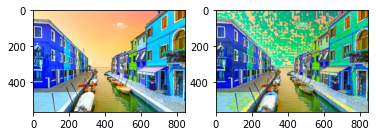

In [ ]:
# plt.rcParams["figure.figsize"] = [20,20]
f, axarr = plt.subplots(1,2) # https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib
axarr[0].imshow(imagenEntrada, cmap="gray", vmin=0, vmax=255)
axarr[1].imshow(imContrastEnhanced, cmap="gray", vmin=0, vmax=255)


Visualización del histogramas: imagen de entrada y de salida.

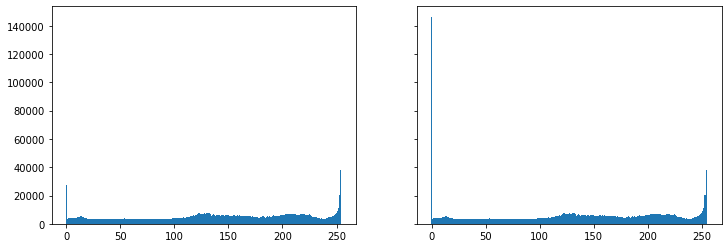

In [ ]:
valsPixel = np.arange(256)
# creating the bar plot:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
axs[0].bar(valsPixel,histoImagenEnt, align='center',width = 1)
axs[1].bar(valsPixel,histoImagenOut, align='center',width = 1)
plt.show()


Tarea: Programar en una única función, disminución y aumento del contraste, verificar visualmente y en los histogramas de imágenes de entrada y salida

In [ ]:
# Principio de operación de la función que modifica el contraste: 

# INICIO - función
def fnHistoContrastEnhance(inputIm,outMin,outMax,inc):
 
 outIm = 0 * inputIm     # Imagen de salida. Tiene el mismo tamaño de la de entrada, y que ambas están en escala de grises.
 inMin = np.min(inputIm) # x1
 inMax = np.max(inputIm) # x2 
                         # y1 e y2 son argumentos de entrada de la función
                         # y1 = outMin
                         # y2 = outMax

# Inicio: algoritmo para modificar contraste.
 pixelInputVal = range(inMin, inMax)

 if inc == True:
  for pixelValue in pixelInputVal:
    outIm[inputIm == pixelValue] = ((outMax - outMin) / (inMax - inMin)) * (pixelValue - inMin) + outMin
 else:
  for pixelValue in pixelInputVal:
    outIm[inputIm == pixelValue] = ((pixelValue - inMin) / (inMax - inMin)) * (outMax - outMin) + outMin
   
 print(outIm)
 return outIm
 
# Final: algoritmo para modificar contraste. 
# FINAL - Función 

# INICIO - función que calcula el histograma de una imagen.
def fnHistograma(inputIm):
 vHistograma = np.zeros((1,256))
 pixelRange = range(0,255)
 
 for pixelValue in pixelRange: # Algoritmo para la función propuesto en (2.):  
  vHistograma[0,pixelValue] = (inputIm == pixelValue).sum() # https://aarsh.dev/2017/10/15/python-numpy-count-elements/

 return vHistograma
# FINAL - Función 

imContrastEnhanced = fnHistoContrastEnhance(imagenEntrada,0,100,True)
imContrastEnhanced = fnHistoContrastEnhance(imagenEntrada,0,100,False)

# Caso donde la imagen está en escala de grises
histoImagenEnt = fnHistograma(imagenEntrada)
histoImagenEnt = list(histoImagenEnt.flatten()) 

histoImagenOut = fnHistograma(imContrastEnhanced)
histoImagenOut = list(histoImagenOut.flatten())

[[81 81 81 ... 76 78 78]
 [81 81 81 ... 76 78 78]
 [81 81 81 ... 76 78 78]
 ...
 [78 76 76 ... 60 60 61]
 [78 76 76 ... 62 57 54]
 [78 77 77 ... 71 67 63]]
[[81 81 81 ... 76 78 78]
 [81 81 81 ... 76 78 78]
 [81 81 81 ... 76 78 78]
 ...
 [78 76 76 ... 60 60 61]
 [78 76 76 ... 62 57 54]
 [78 77 77 ... 71 67 63]]


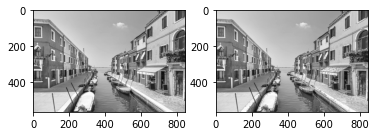

In [ ]:
f, axarr = plt.subplots(1,2) # https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib
axarr[0].imshow(imagenEntrada, cmap="gray", vmin=0, vmax=255)
axarr[1].imshow(imContrastEnhanced, cmap="gray", vmin=0, vmax=255)

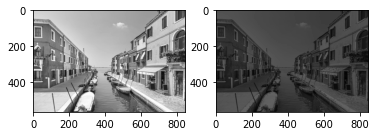

In [ ]:
f, axarr = plt.subplots(1,2) # https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib
axarr[0].imshow(imagenEntrada, cmap="gray", vmin=0, vmax=255)
axarr[1].imshow(imContrastEnhanced, cmap="gray", vmin=0, vmax=255)

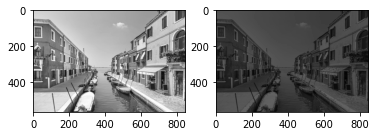

In [ ]:
f, axarr = plt.subplots(1,2) # https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib
axarr[0].imshow(imagenEntrada, cmap="gray", vmin=0, vmax=255)
axarr[1].imshow(imContrastEnhanced, cmap="gray", vmin=0, vmax=255)